In [1]:
from __future__ import print_function
from utils import get_config
from trainer import MUNIT_Trainer, UNIT_Trainer
import argparse
from torch.autograd import Variable
import torchvision.utils as vutils
import sys
import torch
import os
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [2]:
class Opts:
    def __init__(self):
        self.config = "/home/soonyau/temp/config.yaml"
        self.input = "./mvp_inputs/input.jpg" 
        self.output_folder = "./mvp_results" 
        self.checkpoint = "/home/soonyau/temp/checkpoints/gen_00024000.pt"
        self.style = ""
        self.a2b = 1
        self.seed = 10
        self.num_style = 1
        self.synchronized = True
        self.output_only = True
        self.output_path = ""
        self.trainer = "MUNIT"
        
opts = Opts()

In [3]:
torch.manual_seed(opts.seed)
torch.cuda.manual_seed(opts.seed)
if not os.path.exists(opts.output_folder):
    os.makedirs(opts.output_folder)
config = get_config(opts.config)
opts.num_style = 1 if opts.style != '' else opts.num_style

In [11]:
config['vgg_model_path'] = opts.output_path
style_dim = config['gen']['style_dim']
trainer = MUNIT_Trainer(config)

state_dict = torch.load(opts.checkpoint)
trainer.gen_a.load_state_dict(state_dict['a'])
trainer.gen_b.load_state_dict(state_dict['b'])
trainer.cuda()
trainer.eval()
encode = trainer.gen_a.encode if opts.a2b else trainer.gen_b.encode # encode function
style_encode = trainer.gen_b.encode if opts.a2b else trainer.gen_a.encode # encode function
decode = trainer.gen_b.decode if opts.a2b else trainer.gen_a.decode # decode function


if 'new_size' in config:
    new_size = config['new_size']
else:
    if opts.a2b==1:
        new_size = config['new_size_a']
    else:
        new_size = config['new_size_b']


In [21]:
def generate(raw_img, style_rand):
    with torch.no_grad():
        transform = transforms.Compose([transforms.Resize(new_size),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        print("raw",raw_img.size)
        image = Variable(transform(raw_img).unsqueeze(0).cuda())
        print("transform",image.shape)
        style_image = Variable(transform(Image.open(opts.style).convert('RGB')).unsqueeze(0).cuda()) if opts.style != '' else None

        content, _ = encode(image)
    
        if opts.style != '':
            _, style = style_encode(style_image)
        else:
            style = style_rand
        for j in range(opts.num_style):
            s = style[j].unsqueeze(0)
            outputs = decode(content, s)
            
            outputs = (outputs + 1) / 2.
            path = os.path.join(opts.output_folder, 'output{:03d}.jpg'.format(j))
            vutils.save_image(outputs.data, path, padding=0, normalize=True)    
            
            gen_img = Image.open(path).convert('RGB')
            plt.imshow(gen_img)
            plt.show()

In [29]:
input_dir = '/home/soonyau/dataset/fashion/zalando_munit/testA/'
sketch_files = [fname for fname in glob.glob(input_dir+'*')]
sketch_files.sort()


In [30]:
style_rand = Variable(torch.randn(opts.num_style, style_dim, 1, 1).cuda())


/home/soonyau/dataset/fashion/zalando_munit/testA/005023_1.png
(512, 512)


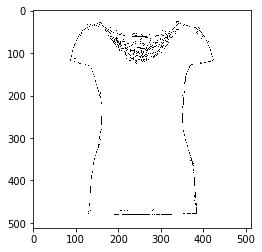

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


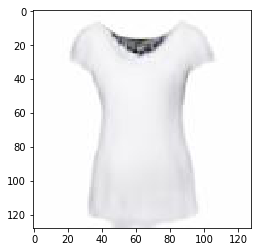

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


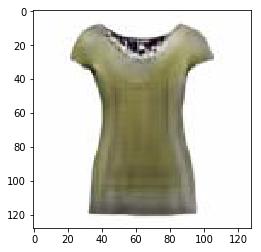

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


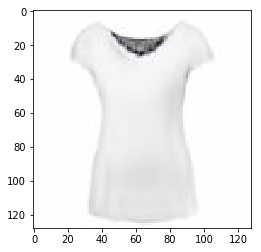

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


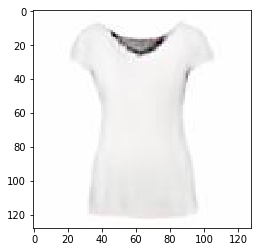

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


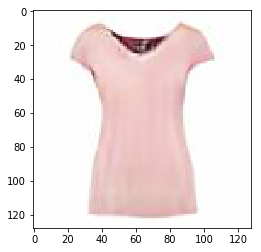

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


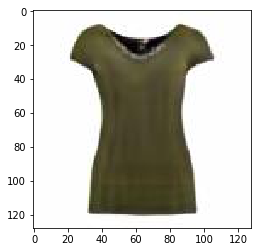

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


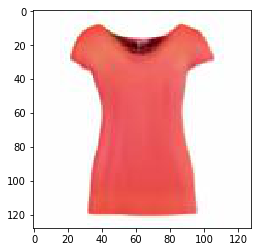

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


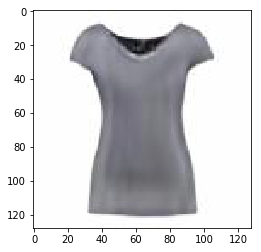

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


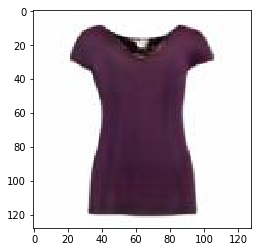

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


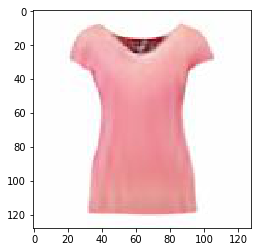

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


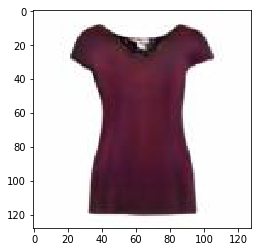

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


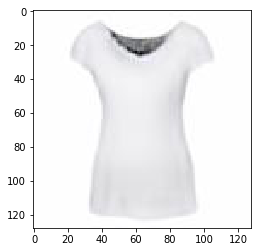

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


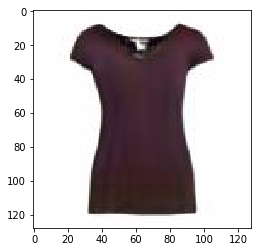

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


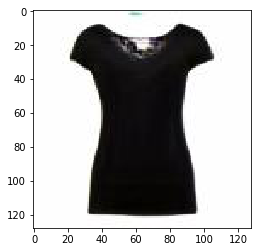

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


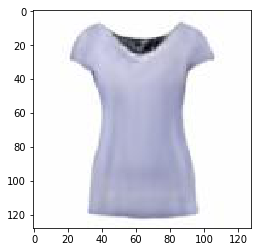

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


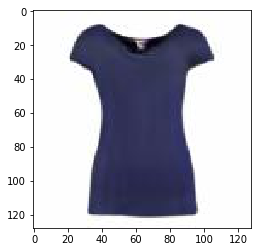

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


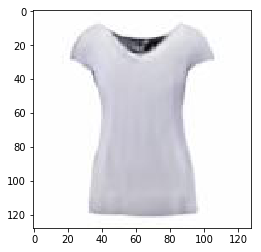

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


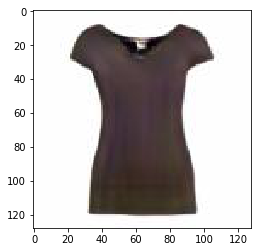

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


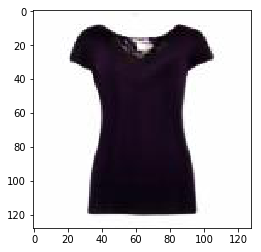

raw (512, 512)
transform torch.Size([1, 3, 128, 128])


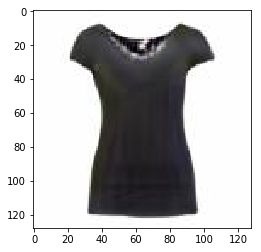

In [65]:
idx = 23
for i in range(idx,idx+1):
    print(sketch_files[i])
    raw_img = Image.open(sketch_files[i]).convert('RGB')
    print(raw_img.size)
    plt.imshow(raw_img)
    plt.show()
    rand_idx = 40
    sweeps = [x * 0.2 -1 for x in range(0, 20)]
    for s in sweeps:
        style_rand_ = Variable(torch.randn(opts.num_style, style_dim, 1, 1).cuda())
        #style_rand_ = style_rand
        #style_rand_[0][rand_idx][0] = s
        generate(raw_img, style_rand_)
